link of data used: [spambase](https://archive.ics.uci.edu/dataset/94/spambase)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# load dataset

In [73]:
pip install ucimlrepo

In [74]:
from ucimlrepo import fetch_ucirepo

spambase = fetch_ucirepo(id=94)
X = spambase.data.features
y = spambase.data.targets

# **understanding data**

In [75]:
X.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749


In [76]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [77]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


# handeling missing data

###finding amount of missing data in each column

In [78]:
max_non_null_val = 0
for col in X.columns:
  val = X[col].count()
  if(val > max_non_null_val):
    max_non_null_val = val;

print("Percentage of missing values in each column:\n")
missing_percent = []
for col in X.columns:
  missing_percent.append(X[col].isnull().sum()/max_non_null_val*100)
  print(f"{col} : {X[col].isnull().sum()/max_non_null_val*100:.2f}%")

Percentage of missing values in each column:

word_freq_make : 0.00%
word_freq_address : 0.00%
word_freq_all : 0.00%
word_freq_3d : 0.00%
word_freq_our : 0.00%
word_freq_over : 0.00%
word_freq_remove : 0.00%
word_freq_internet : 0.00%
word_freq_order : 0.00%
word_freq_mail : 0.00%
word_freq_receive : 0.00%
word_freq_will : 0.00%
word_freq_people : 0.00%
word_freq_report : 0.00%
word_freq_addresses : 0.00%
word_freq_free : 0.00%
word_freq_business : 0.00%
word_freq_email : 0.00%
word_freq_you : 0.00%
word_freq_credit : 0.00%
word_freq_your : 0.00%
word_freq_font : 0.00%
word_freq_000 : 0.00%
word_freq_money : 0.00%
word_freq_hp : 0.00%
word_freq_hpl : 0.00%
word_freq_george : 0.00%
word_freq_650 : 0.00%
word_freq_lab : 0.00%
word_freq_labs : 0.00%
word_freq_telnet : 0.00%
word_freq_857 : 0.00%
word_freq_data : 0.00%
word_freq_415 : 0.00%
word_freq_85 : 0.00%
word_freq_technology : 0.00%
word_freq_1999 : 0.00%
word_freq_parts : 0.00%
word_freq_pm : 0.00%
word_freq_direct : 0.00%
word_fre

###classifying columns based on numerical or categorical data

In [79]:
def classify_cols(df , cat_thresh = 15, card_thresh  = 20 ):
  cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
  num_but_cat_cols = [col for col in df.columns if df[col].dtypes != "O" and df[col].nunique()<cat_thresh]
  cat_but_card_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique()>card_thresh]
  # cat_cols = cat_cols + num_but_cat_cols
  cat_cols = [col for col in cat_cols if col not in cat_but_card_cols]
  num_cols = [col for col in df.columns if df[col].dtypes != "O" and col not in num_but_cat_cols]
  return cat_cols, num_cols, cat_but_card_cols,num_but_cat_cols

cat_cols, num_cols, cat_but_card_cols, num_but_cat_cols = classify_cols(X)
print(f"cat_cols: {(cat_cols)}")
print(f"num_cols: {(num_cols)}")
print(f"cat_but_car: {(cat_but_card_cols)}")
print(f"num_but_cat_cols: {(num_but_cat_cols)}")

cat_cols: []
num_cols: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',

# Descriptive stats


In [80]:
stats = X.describe()
print(stats)

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

#correlation matrix of dataframe


In [81]:
full_df = pd.concat([X, y], axis=1)
full_corr = full_df.corr()
full_corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


# dropping columns with less than 1% correlation

In [82]:
corr_coef_with_target_value = full_corr["Class"].values
indexes_with_lessthan_10_corr = []
for i in corr_coef_with_target_value:
  if (abs(i)<0.05):
    indexes_with_lessthan_10_corr.append(indexOf(corr_coef_with_target_value,i))
X.drop(X.columns[indexes_with_lessthan_10_corr], axis=1,inplace=True)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_all               4601 non-null   float64
 2   word_freq_3d                4601 non-null   float64
 3   word_freq_our               4601 non-null   float64
 4   word_freq_over              4601 non-null   float64
 5   word_freq_remove            4601 non-null   float64
 6   word_freq_internet          4601 non-null   float64
 7   word_freq_order             4601 non-null   float64
 8   word_freq_mail              4601 non-null   float64
 9   word_freq_receive           4601 non-null   float64
 10  word_freq_people            4601 non-null   float64
 11  word_freq_report            4601 non-null   float64
 12  word_freq_addresses         4601 non-null   float64
 13  word_freq_free              4601 

<ipython-input-82-fd104d4efad6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(X.columns[indexes_with_lessthan_10_corr], axis=1,inplace=True)


# Splitting training data into training and testing datasets

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


#Data scaling

In [84]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# df_test = sc.transform(df_test)

In [85]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# df_test = scaler.transform(df_test)


In [86]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



#Trainnig Logistic regression model



In [87]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[649  42]
 [ 67 393]]


0.9052997393570807

###Testing model for overfitting

In [89]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[2009   88]
 [ 133 1220]]


0.9359420289855073

###Grid search






In [90]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Accuracy: 93.33 %
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###building model with best parameters

In [91]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[649  42]
 [ 67 393]]


0.9052997393570807

#Training a knn model




In [92]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[650  41]
 [ 75 385]]


0.8992180712423979

###testing for overfiting

In [94]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[1994  103]
 [ 134 1219]]


0.931304347826087

###Grid search

In [95]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': list(range(1, 32)),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 186 candidates, totalling 1860 fits
Best Accuracy: 92.64 %
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


###building model with best parameters

In [96]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[664  27]
 [ 66 394]]


0.9192006950477846

#Training a Descision Tree model

In [97]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[641  50]
 [ 44 416]]


0.9183318853171155

###test for overfitting

In [99]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[2097    0]
 [   0 1353]]


1.0

###Grid search


In [100]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Accuracy: 92.55 %
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


###building model with best parameters

In [101]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[643  48]
 [ 61 399]]


0.9052997393570807

#XG boost model

In [102]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[663  28]
 [ 40 420]]


0.9409209383145091

###Hyperparam tuning with optuna

In [104]:
!pip install optuna


In [105]:

import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score


def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }

    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    y_pred = xgb_model.predict(X_test)
    return 1 - accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print("Best hyperparameters: ", study.best_params)


[I 2024-07-29 14:44:11,041] A new study created in memory with name: no-name-90cd4a10-9f30-4da5-a6a6-22951ba30362
[I 2024-07-29 14:44:12,070] Trial 0 finished with value: 0.05821025195482188 and parameters: {'learning_rate': 0.051433078464395786, 'max_depth': 10, 'n_estimators': 93, 'colsample_bytree': 0.786673546460285, 'subsample': 0.6028767881194619}. Best is trial 0 with value: 0.05821025195482188.
[I 2024-07-29 14:44:12,871] Trial 1 finished with value: 0.05821025195482188 and parameters: {'learning_rate': 0.19531341613305997, 'max_depth': 3, 'n_estimators': 143, 'colsample_bytree': 0.8752812782546397, 'subsample': 0.9282216256647962}. Best is trial 0 with value: 0.05821025195482188.
[I 2024-07-29 14:44:13,808] Trial 2 finished with value: 0.05994787141615987 and parameters: {'learning_rate': 0.18249946482953447, 'max_depth': 3, 'n_estimators': 186, 'colsample_bytree': 0.9814149763984286, 'subsample': 0.59110821775523}. Best is trial 0 with value: 0.05821025195482188.
[I 2024-07-2

Best hyperparameters:  {'learning_rate': 0.18501735502724437, 'max_depth': 9, 'n_estimators': 172, 'colsample_bytree': 0.5123607980291944, 'subsample': 0.5074481782938699}


In [106]:
params = {'learning_rate': 0.19861251176605974, 'max_depth': 9, 'n_estimators': 192, 'colsample_bytree': 0.7577025033430012, 'subsample': 0.919850265302466}
model = xgb.XGBClassifier(**params)

model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[669  22]
 [ 36 424]]


0.9496090356211989

###randomized search hyperparameter tuning

In [107]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

xgb_random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=parameters,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(X_train, y_train)

best_accuracy = xgb_random_search.best_score_
best_parameters = xgb_random_search.best_params_
best_base_classifier = xgb_random_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Accuracy: 95.59 %
Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


###building model with best parameters

In [108]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[664  27]
 [ 40 420]]


0.9417897480451781

###test for overfitting

In [109]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)

[[2097    0]
 [   9 1344]]


0.9973913043478261

#Training a random forest model

In [110]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[675  16]
 [ 46 414]]


0.946133796698523

###Get most important features

<Axes: >

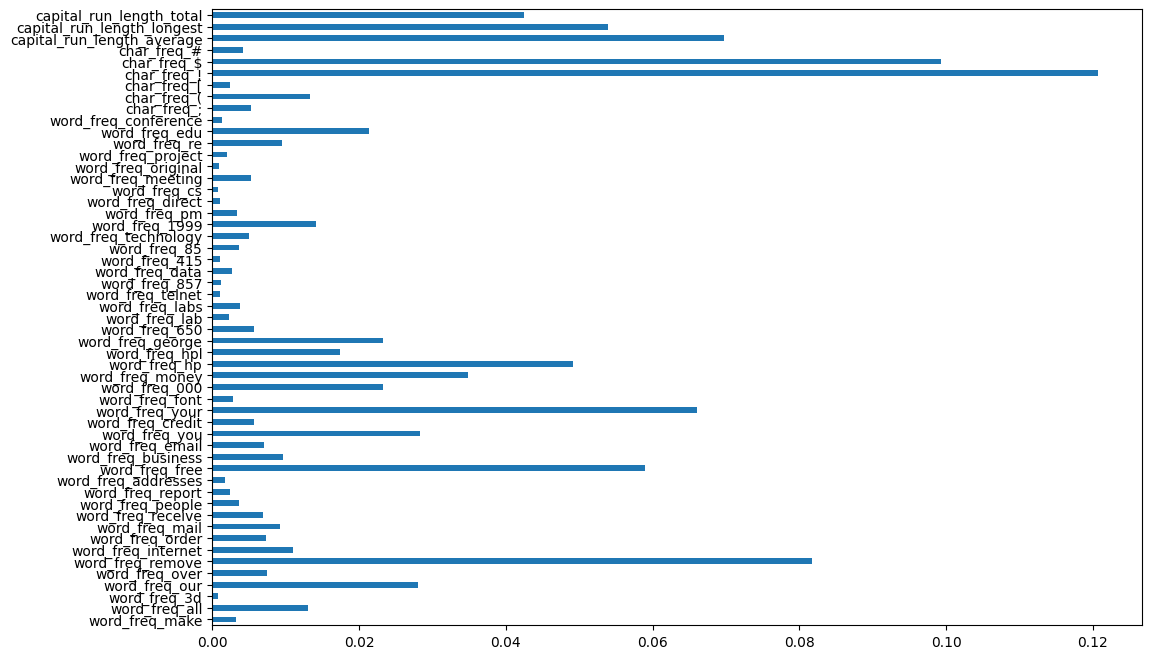

In [112]:
importances = classifier.feature_importances_
df_importances = pd.Series(importances, index = X.columns)
indices = np.argsort(importances)[::-1]
features = X.columns
features
df_importances.plot(kind='barh', figsize=(12,8))

###test for overfitting

In [113]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[2097    0]
 [   0 1353]]


1.0

###Grid search

In [114]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features':['sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Accuracy: 95.71 %
Best Parameters: {'criterion': 'log_loss', 'max_depth': 40, 'max_features': 'log2', 'n_estimators': 200}


###building model with best parameters

In [115]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[674  17]
 [ 45 415]]


0.946133796698523

#Training a svm model

In [116]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 110)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=110)

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[648  43]
 [ 63 397]]


0.9079061685490878

###test for overfitting

In [118]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[2007   90]
 [ 122 1231]]


0.9385507246376812

###model boosting


In [119]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0,0.1, 0.5, 1, 2, 5]
}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Accuracy: 93.22 %
Best Parameters: {'C': 0.5, 'gamma': 0, 'kernel': 'linear'}


In [120]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

clf = BaggingClassifier(estimator=best_base_classifier, random_state=0)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[648  43]
 [ 65 395]]
Accuracy Score:
0.9061685490877498


# Training naive bayes model

In [121]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[479 212]
 [ 32 428]]


0.788010425716768

###test for overfitting

In [123]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[1542  555]
 [  59 1294]]


0.8220289855072463

#Training extra trees model

In [124]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(random_state=0)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[671  20]
 [ 35 425]]


0.952215464813206

#building an ANN

In [126]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

size_input_layer = X_train.shape[1]
size_hidden_layer = (2*size_input_layer // 3) + 2

model = Sequential([
    Dense(units=size_hidden_layer, input_shape=(size_input_layer,), activation='relu'),

    Dense(units=1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [127]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=3,
    epochs=100,
    validation_split = 0.1,
    shuffle=True,
    verbose=2
)

Epoch 1/100
1035/1035 - 3s - loss: 0.4362 - accuracy: 0.8767 - val_loss: 0.2222 - val_accuracy: 0.9275 - 3s/epoch - 3ms/step
Epoch 2/100
1035/1035 - 2s - loss: 0.1962 - accuracy: 0.9314 - val_loss: 0.1616 - val_accuracy: 0.9391 - 2s/epoch - 2ms/step
Epoch 3/100
1035/1035 - 2s - loss: 0.1779 - accuracy: 0.9388 - val_loss: 0.2085 - val_accuracy: 0.9362 - 2s/epoch - 2ms/step
Epoch 4/100
1035/1035 - 2s - loss: 0.1655 - accuracy: 0.9391 - val_loss: 0.1751 - val_accuracy: 0.9333 - 2s/epoch - 2ms/step
Epoch 5/100
1035/1035 - 2s - loss: 0.1520 - accuracy: 0.9452 - val_loss: 0.1798 - val_accuracy: 0.9333 - 2s/epoch - 2ms/step
Epoch 6/100
1035/1035 - 3s - loss: 0.1410 - accuracy: 0.9498 - val_loss: 0.1662 - val_accuracy: 0.9391 - 3s/epoch - 3ms/step
Epoch 7/100
1035/1035 - 2s - loss: 0.1439 - accuracy: 0.9475 - val_loss: 0.1615 - val_accuracy: 0.9507 - 2s/epoch - 2ms/step
Epoch 8/100
1035/1035 - 2s - loss: 0.1302 - accuracy: 0.9507 - val_loss: 0.1418 - val_accuracy: 0.9420 - 2s/epoch - 2ms/step


In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

36/36 [==============================] - 0s 1ms/step
[[658  33]
 [ 39 421]]


0.9374456993918332